In [2]:
import pandas as pd
from xgboost import XGBRegressor
import holidays
from pathlib import Path
import numpy as np
from sklearn.preprocessing import StandardScaler
import bike_count as bc
import importlib

c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### NEW PIPELINE ATTEMPT

In [3]:
importlib.reload(bc)

<module 'bike_count' from 'c:\\Users\\lucie\\XHEC Python for Data Science\\bike_count_ldmh\\bike_count.py'>

In [5]:
X, y = bc.get_model_data()

In [7]:
pipe = bc.xgb_table_vectorized()

In [8]:
pipe.fit(X, y)

c:\Users\lucie\anaconda3\envs\bikes-count\lib\site-packages\skrub\_check_input.py:169: UserWarning: Only pandas and polars DataFrames are supported, but input is a Numpy array. Please convert Numpy arrays to DataFrames before passing them to skrub transformers. Converting to pandas DataFrame with columns ['0', '1', …].
  warnings.warn(
c:\Users\lucie\anaconda3\envs\bikes-count\lib\site-packages\skrub\_clean_null_strings.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return col.replace(r"^\s*$", "", regex=True)
c:\Users\lucie\anaconda3\envs\bikes-count\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to mat

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_date at 0x0000014B483F79A0>)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_cols', 'drop',
                                                  ['coordinates', 'counter_id',
                                                   'site_id',
                                                   'counter_installation_date'])])),
                ('tablevectorizer', TableVectorizer()),
                ('xgbregressor',
                 XGBRegressor(base_s...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [9]:
test_data = pd.read_parquet("data/final_test.parquet")
test_pred = pipe.predict(test_data)

test_df = pd.DataFrame({"Id": range(0, len(test_pred)), "log_bike_count": test_pred})

test_df.to_csv("new_xgb_pipe2.csv", index=False)

c:\Users\lucie\anaconda3\envs\bikes-count\lib\site-packages\skrub\_check_input.py:169: UserWarning: Only pandas and polars DataFrames are supported, but input is a Numpy array. Please convert Numpy arrays to DataFrames before passing them to skrub transformers. Converting to pandas DataFrame with columns ['0', '1', …].
  warnings.warn(
c:\Users\lucie\anaconda3\envs\bikes-count\lib\site-packages\skrub\_clean_null_strings.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return col.replace(r"^\s*$", "", regex=True)


Pipeline: Table vectorizer, columns dropped: toutes sauf counter_installation_date, counter_name, lati, longi, date

date: date encoder perso

counter_installation_date: Classic DatetimeEncoder()

In [46]:
importlib.reload(bc)

<module 'bike_count' from 'c:\\Users\\diane\\bike_count_ldmh\\bike_count.py'>

In [47]:
X, y = bc.get_model_data()

In [48]:
pipe = bc.xgb_vectorized_no_date_encoding()
pipe.fit(X, y)

c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\skrub\_check_input.py:169: UserWarning: Only pandas and polars DataFrames are supported, but input is a Numpy array. Please convert Numpy arrays to DataFrames before passing them to skrub transformers. Converting to pandas DataFrame with columns ['0', '1', …].
  warnings.warn(
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_date at 0x000001A1FE89ECB0>)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_cols', 'drop',
                                                  ['coordinates', 'counter_id',
                                                   'site_id', 'site_name',
                                                   'counter_technical_id'])])),
                ('tablevectorizer',
                 TableVectorizer(datetime=DatetimeEncoder(add_to...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [49]:
test_data = pd.read_parquet("data/final_test.parquet")
test_pred = pipe.predict(test_data)

test_df = pd.DataFrame({"Id": range(0, len(test_pred)), "log_bike_count": test_pred})

test_df.to_csv("new_xgb_pipe_vac.csv", index=False)

c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\skrub\_check_input.py:169: UserWarning: Only pandas and polars DataFrames are supported, but input is a Numpy array. Please convert Numpy arrays to DataFrames before passing them to skrub transformers. Converting to pandas DataFrame with columns ['0', '1', …].
  warnings.warn(


Conclusion: je garde une RMSE autour de 0.64 en enlevant quand meme deux features catégoriques qui sont tres conséquents: site_name et counter_technical_id

### Validation Croisée

In [6]:
from sklearn.model_selection import cross_val_score

In [16]:
X, y = bc.get_model_data()

In [17]:
X_train, X_test, y_train, y_test = bc.train_test_temporal(X, y)

In [18]:
pipe = bc.xgb_vectorized_no_date_encoding()

In [ ]:
scores = cross_val_score(pipe, X, y, cv=5, scoring='neg_root_mean_squared_error')

c:\Users\lucie\anaconda3\envs\bikes-count\lib\site-packages\skrub\_check_input.py:169: UserWarning: Only pandas and polars DataFrames are supported, but input is a Numpy array. Please convert Numpy arrays to DataFrames before passing them to skrub transformers. Converting to pandas DataFrame with columns ['0', '1', …].
  warnings.warn(
c:\Users\lucie\anaconda3\envs\bikes-count\lib\site-packages\skrub\_check_input.py:169: UserWarning: Only pandas and polars DataFrames are supported, but input is a Numpy array. Please convert Numpy arrays to DataFrames before passing them to skrub transformers. Converting to pandas DataFrame with columns ['0', '1', …].
  warnings.warn(
c:\Users\lucie\anaconda3\envs\bikes-count\lib\site-packages\skrub\_check_input.py:169: UserWarning: Only pandas and polars DataFrames are supported, but input is a Numpy array. Please convert Numpy arrays to DataFrames before passing them to skrub transformers. Converting to pandas DataFrame with columns ['0', '1', …].
  w

In [22]:
(-scores).mean()

np.float64(0.7186859733369984)

In [23]:
# encore de l'EDA

In [29]:
def custom_merge_external_data(X):
    # FONCTION UN PEU MODIFIEE PAR RAPPORT A CELLE DE LA PIPELINE
    #file_path = Path(__file__).parent / "external_data//external_data.csv"

    df_ext = pd.read_csv("external_data//external_data.csv", parse_dates=["date"])
    df_ext['date'] = pd.to_datetime(df_ext['date']).astype('datetime64[us]')

    X = X.copy()
    X["orig_index"] = np.arange(X.shape[0])
    X = pd.merge_asof(
        X.sort_values("date"), df_ext.sort_values("date"), on="date", direction='nearest',
    )
    X = X.sort_values("orig_index")
    del X["orig_index"]
    return X

def custom_get_model_data(path='data/train.parquet'):

    data = pd.read_parquet(path)
    data.sort_values(['date', 'counter_name'], inplace=True)
    y = data['log_bike_count'].values
    X = data

    return X, y

In [30]:
X, y = custom_get_model_data()
X = custom_merge_external_data(X)

In [6]:
corr = X.select_dtypes(include=['int', 'float']).corr()
bike_count_assoc = corr.iloc[:, 1].sort_values(ascending=False)[2:].dropna()
bike_count_assoc

t            0.254320
tx12         0.219782
tn12         0.184893
latitude     0.131880
td           0.098675
rafper       0.098353
raf10        0.096673
ff           0.077014
hnuage4      0.074543
hnuage3      0.074209
hnuage2      0.064220
cod_tend     0.059478
vv           0.058932
pres         0.048892
nnuage4      0.047385
hnuage1      0.045747
hbas         0.044110
pmer         0.041593
ctype1       0.016807
longitude    0.014581
ht_neige     0.007690
tend24       0.007354
site_id     -0.003479
cl          -0.005432
ch          -0.011055
dd          -0.020330
ssfrai      -0.020504
cm          -0.024299
ctype3      -0.028517
n           -0.028674
rr1         -0.034169
ctype2      -0.038136
rr3         -0.041055
rr6         -0.048255
tend        -0.050577
nbas        -0.051082
w2          -0.056140
w1          -0.056569
perssfrai   -0.058439
rr24        -0.060613
rr12        -0.061423
ww          -0.084857
etat_sol    -0.087067
nnuage1     -0.093562
ctype4      -0.106406
nnuage2   

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
rain = X[['rr1', 'rr3', 'rr6', 'rr12', 'rr24']]
rain = rain[rain['rr24'] != 0]

c:\Users\lucie\anaconda3\envs\bikes-count\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


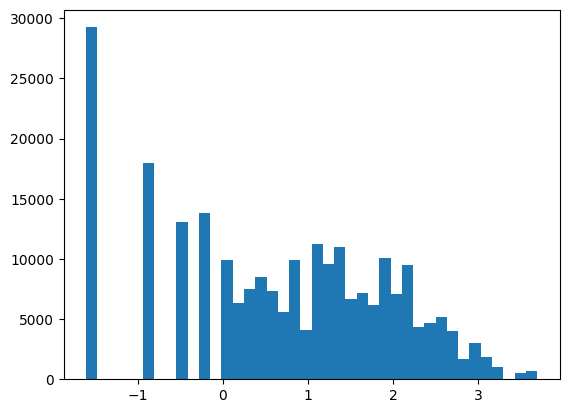

In [15]:
temp = np.log(rain['rr24'])
plt.hist(temp, bins=40);

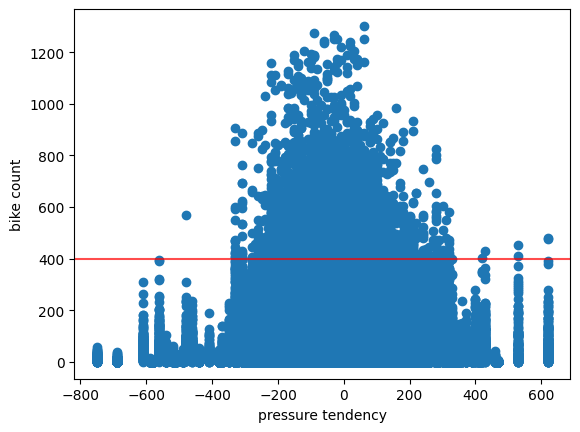

In [150]:
plt.scatter(X['tend'], X['bike_count'])
plt.ylabel('bike count')
plt.xlabel('pressure tendency')
plt.axhline(400, color='r', alpha=0.7);

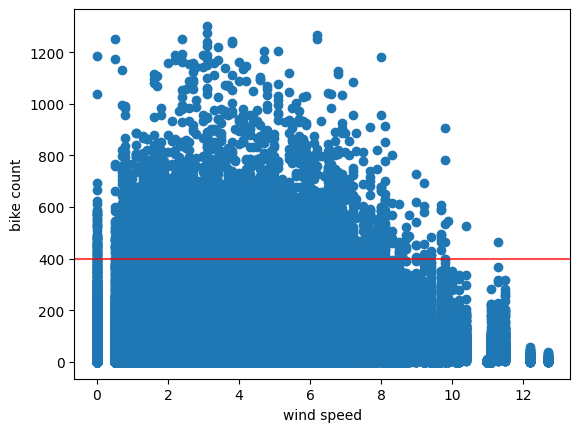

In [151]:
plt.scatter(X['ff'], X['bike_count'])
plt.ylabel('bike count')
plt.xlabel('wind speed')
plt.axhline(400, color='r', alpha=0.7);

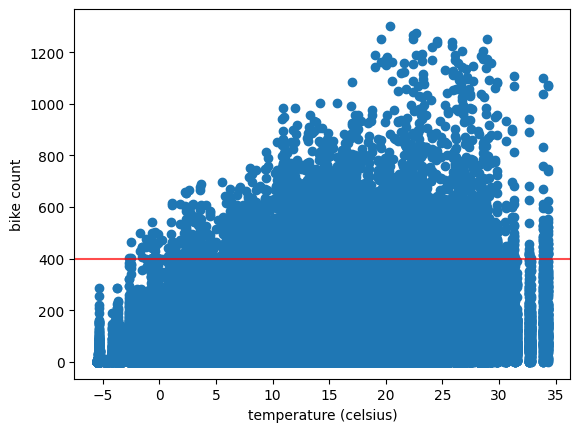

In [152]:
plt.scatter(X['t'] - 273.15, X['bike_count'])
plt.ylabel('bike count')
plt.xlabel('temperature (celsius)')
plt.axhline(400, color='r', alpha=0.7);

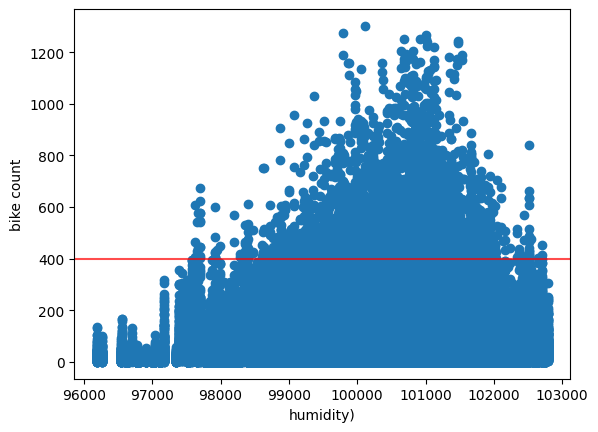

In [159]:
plt.scatter(X['pres'], X['bike_count'])
plt.ylabel('bike count')
plt.xlabel('humidity)')
plt.axhline(400, color='r', alpha=0.7);

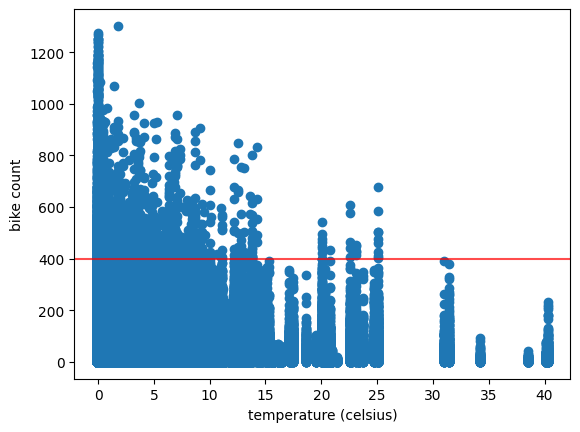

In [167]:
plt.scatter(X['rr24'], X['bike_count'])
plt.ylabel('bike count')
plt.xlabel('temperature (celsius)')
plt.axhline(400, color='r', alpha=0.7);

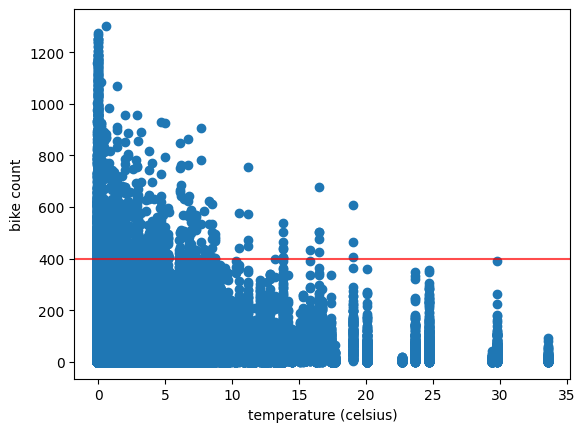

In [168]:
plt.scatter(X['rr12'], X['bike_count'])
plt.ylabel('bike count')
plt.xlabel('temperature (celsius)')
plt.axhline(400, color='r', alpha=0.7);

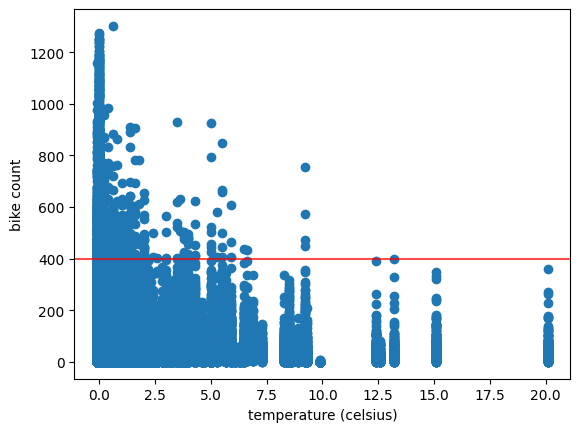

In [194]:
plt.scatter(X['rr3'], X['bike_count'])
plt.ylabel('bike count')
plt.xlabel('temperature (celsius)')
plt.axhline(400, color='r', alpha=0.7);

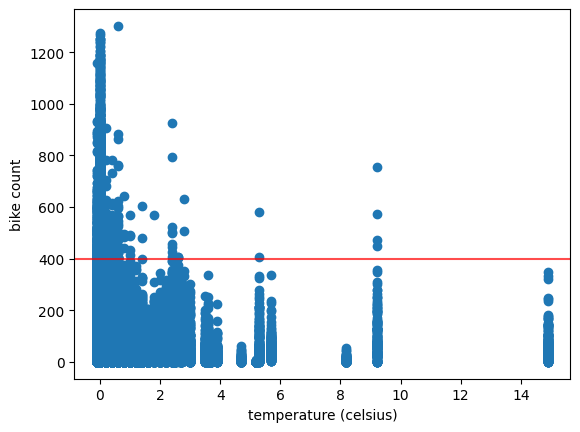

In [195]:
plt.scatter(X['rr1'], X['bike_count'])
plt.ylabel('bike count')
plt.xlabel('temperature (celsius)')
plt.axhline(400, color='r', alpha=0.7);

## TRYING THE BEST PIPELINE WITH MERGING 

In [3]:
importlib.reload(bc)

<module 'bike_count' from 'c:\\Users\\diane\\bike_count_ldmh\\bike_count.py'>

In [4]:
X, y = bc.get_model_data()

In [5]:
pipe = bc.xgb_vectorized_no_date_encoding()
pipe.fit(X, y)

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function _merge_external_data at 0x000002CE2DCA68C0>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function _encode_date at 0x000002CE2B076B00>)),
                ('tablevectorizer',
                 TableVectorizer(datetime=DatetimeEncoder(add_total_seconds=False,
                                                          resolution='month'),
                                 n_jobs=-1,
                                 specific_transformers=...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.16878974156327872, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=11,
                              max_leaves=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=139,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=42, ...))])

In [6]:
test_data = pd.read_parquet("data/final_test.parquet")
test_pred = pipe.predict(test_data)

test_df = pd.DataFrame({"Id": range(0, len(test_pred)), "log_bike_count": test_pred})

test_df.to_csv("best_pipe_opt.csv", index=False)

In [64]:
importlib.reload(bc)

<module 'bike_count' from 'c:\\Users\\lucie\\XHEC Python for Data Science\\bike_count_ldmh\\bike_count.py'>

In [65]:
X, y = bc.get_model_data()
pipe = bc.extra_trees()
pipe.fit(X, y)

TypeError: Cannot setitem on a Categorical with a new category (0), set the categories first

In [ ]:
test_data = pd.read_parquet("data/final_test.parquet")
test_pred = pipe.predict(test_data)

test_df = pd.DataFrame({"Id": range(0, len(test_pred)), "log_bike_count": test_pred})

test_df.to_csv("extra_trees.csv", index=False)